# Lab 6: Hypothesis testing

- Two sample t-test
- ANOVA for multiple samples 
- F-test for equal variance
- Association chi-square test
- Nonparametric test (Mann-Whitney) for two samples
- Likelihood ratio test
- Normality test


## Two sample t-test
We first generate data in R. The observations in the control group are simulated from $Normal(1,1)$. The treatment group is simulated from $Normal(2,1)$.

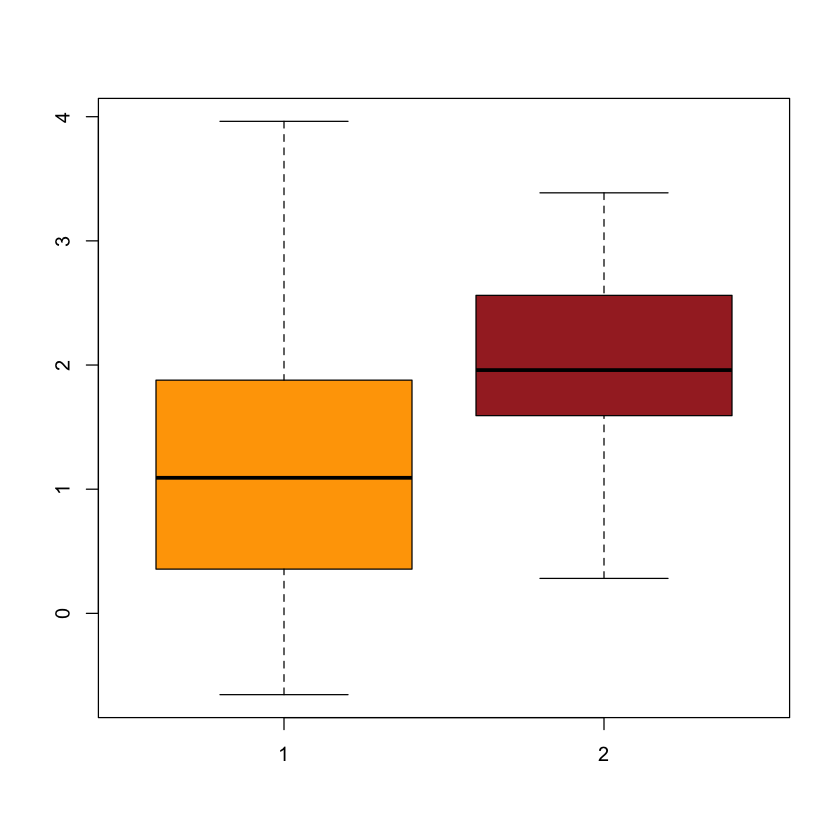

In [1]:
control = rnorm(20, mean=1, sd=1)
treatment = rnorm(30, mean=2, sd=1)
boxplot(control, treatment, col=c("orange","brown"))

$\mu_1$: the population mean of the control population \
$\mu_2$: the population mean of the treatment population

$H_0: \mu_1 = \mu_2$ and $H_1: \mu_1\ne \mu_2$

We perform the two sample t-test in R. This is a two-sided test.

In [2]:
t.test(x=control, y=treatment, alternative="two.sided")


	Welch Two Sample t-test

data:  control and treatment
t = -2.858, df = 33.165, p-value = 0.007312
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.3932332 -0.2346286
sample estimates:
mean of x mean of y 
 1.169346  1.983277 


Because pvalue < 0.05, we reject the null and accept the alternative hypothesis that two population means (control and treatment) are not equal to each other. 

## Analysis of Variance (ANOVA) 
We generate multiple samples from the normal distributions with the same variance, and combine the samples as a data.frame in R. The first column is data and the second column denotes groups.

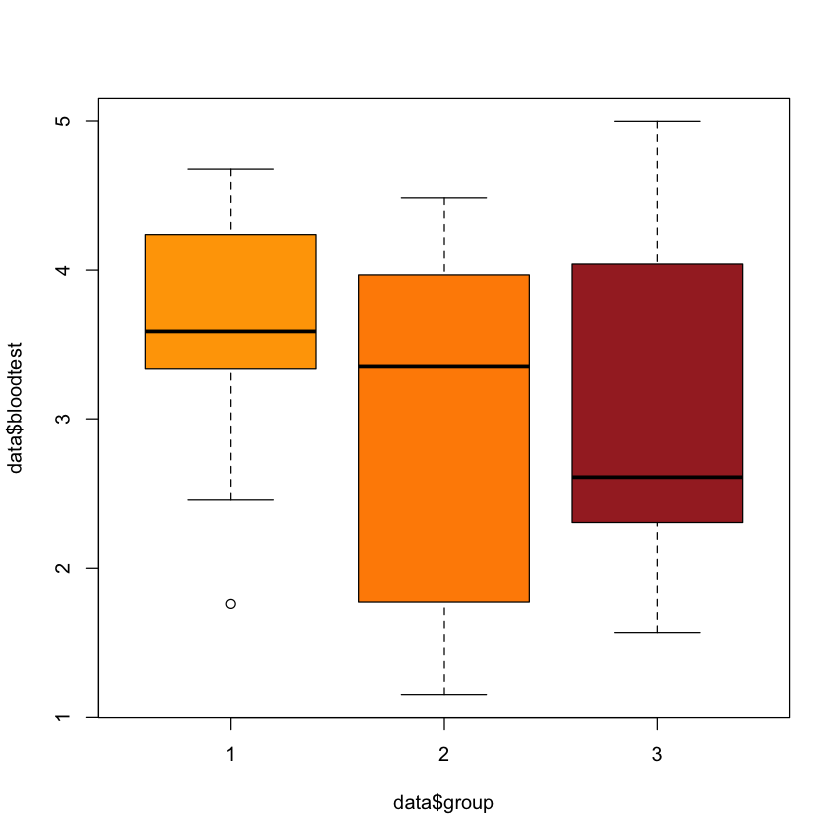

In [3]:
data = matrix(0,nrow=30,ncol=2)
data[1:12,1] = rnorm(12,mean=3,sd=1)
data[1:12,2]= 1
data[13:20,1] = rnorm(8,mean=3,sd=1)
data[13:20,2]= 2
data[21:30,1] = rnorm(10,mean=3,sd=1)
data[21:30,2] = 3
colnames(data) = c("bloodtest","group")
data = data.frame(data)
data$group = as.factor(data$group)
boxplot(data$bloodtest ~ data$group, col=c("orange","darkorange","brown"))

$H_0: \mu_1=\mu_2=\mu_3$ and $H_1$: at least two population means are not equal

We perform ANOVA in R.

In [4]:
fit = aov(data$bloodtest~data$group)
summary(fit)

            Df Sum Sq Mean Sq F value Pr(>F)
data$group   2  3.077   1.538   1.393  0.266
Residuals   27 29.816   1.104               

Because pvalue > 0.05, we cannot reject the null hypothesis. Next, we generate multiple samples from the normal distributions with different means.

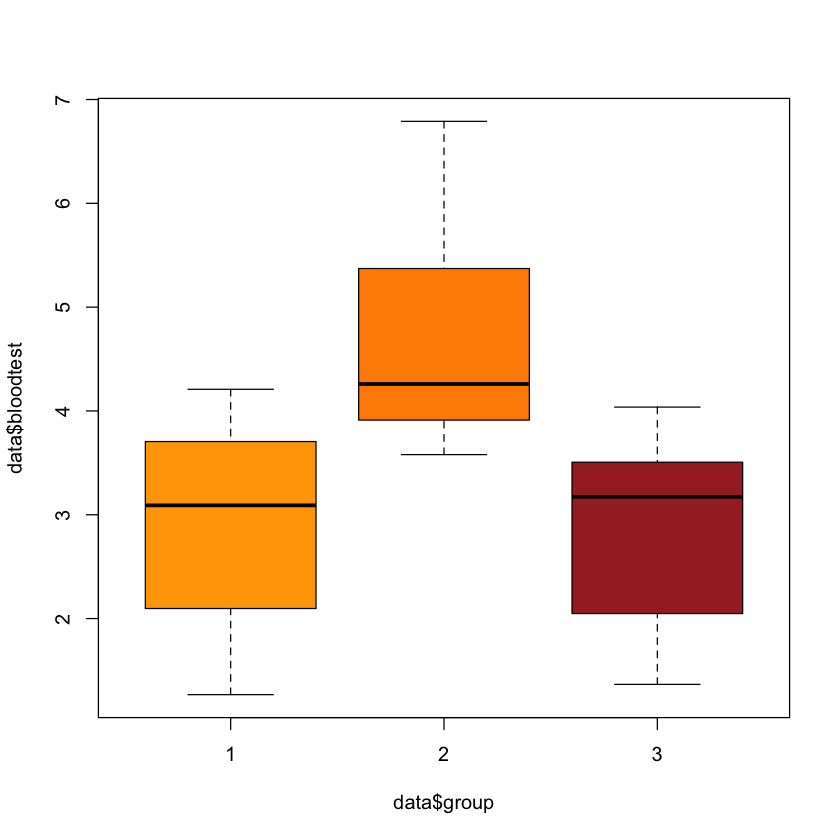

In [5]:
data = matrix(0,nrow=30,ncol=2)
data[1:12,1] = rnorm(12,mean=3,sd=1)
data[1:12,2]= 1
data[13:20,1] = rnorm(8,mean=5,sd=1)
data[13:20,2]= 2
data[21:30,1] = rnorm(10,mean=3,sd=1)
data[21:30,2] = 3
colnames(data) = c("bloodtest","group")
data = data.frame(data)
data$group = as.factor(data$group)
boxplot(data$bloodtest ~ data$group, col=c("orange","darkorange","brown"))

We perform ANOVA in R.

In [6]:
fit = aov(data$bloodtest~data$group)
summary(fit)

            Df Sum Sq Mean Sq F value   Pr(>F)    
data$group   2  18.76   9.378   9.561 0.000725 ***
Residuals   27  26.48   0.981                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## F-test to compare two variances
We generate the control and treatment groups from two normal distributions with the same variance, and perform the F test to compare the two population variances. 

$H_0:\sigma_1^2 = \sigma_2^2$ and $H_0:\sigma_1^2 \ne \sigma_2^2$


	F test to compare two variances

data:  control and treatment
F = 0.99823, num df = 19, denom df = 29, p-value = 0.9801
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.4473816 2.3976935
sample estimates:
ratio of variances 
         0.9982309 


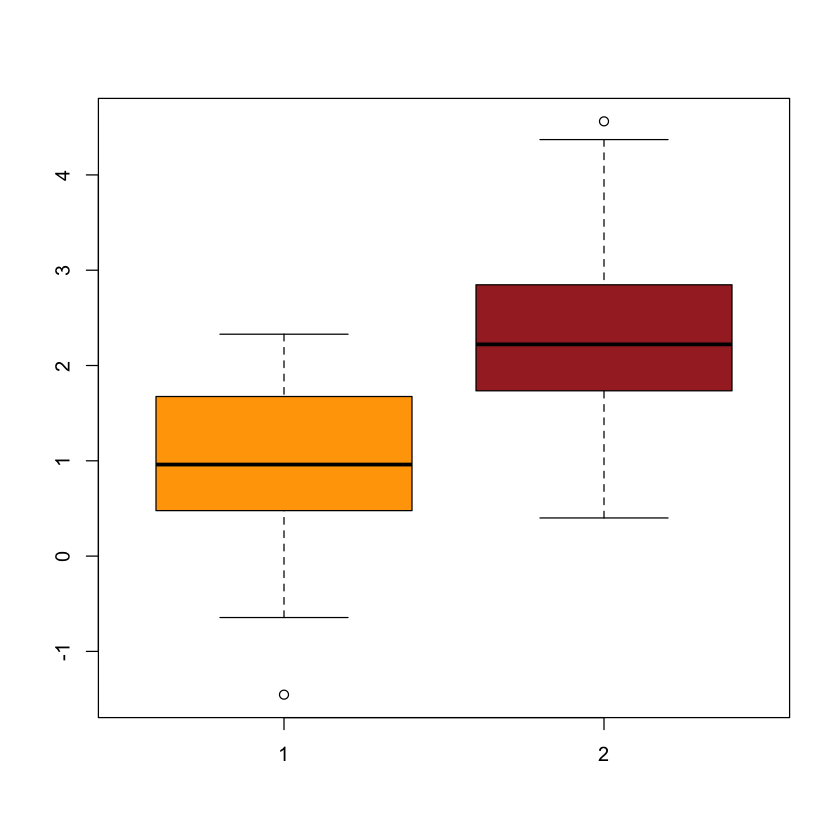

In [7]:
control = rnorm(20, mean=1, sd=1)
treatment = rnorm(30, mean=2, sd=1)
boxplot(control, treatment, col=c("orange","brown"))
var.test(x=control, y=treatment, alternative = "two.sided")

Then, we generate the control and treatment groups from two normal distributions with unequal variances.


	F test to compare two variances

data:  control and treatment
F = 21.691, num df = 19, denom df = 29, p-value = 5.453e-12
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  9.721351 52.100529
sample estimates:
ratio of variances 
            21.691 


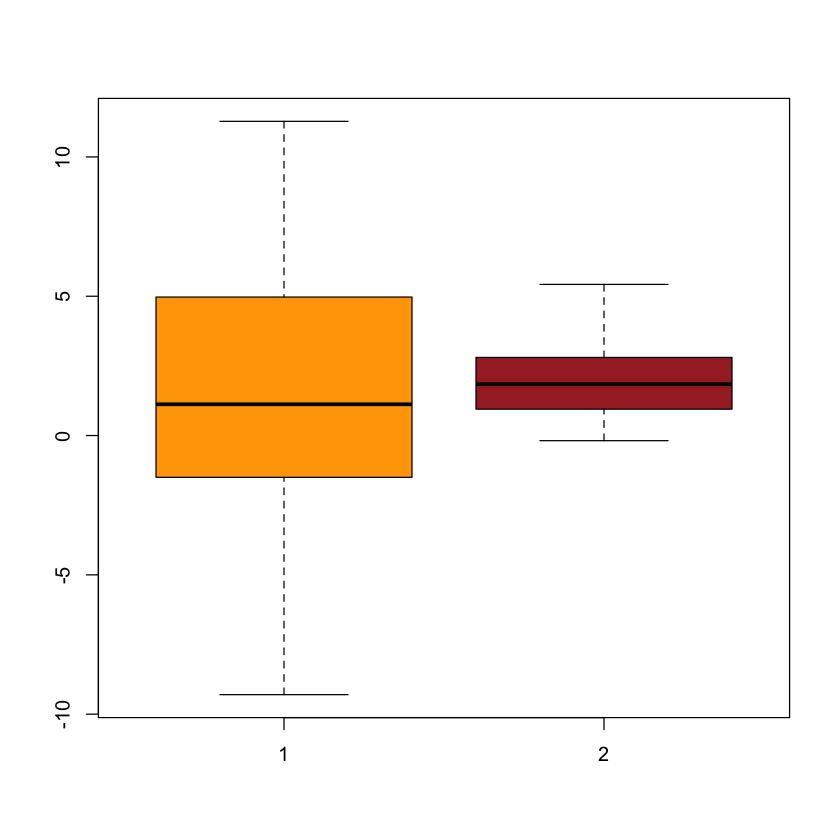

In [8]:
control = rnorm(20, mean=1, sd=5)
treatment = rnorm(30, mean=2, sd=1)
boxplot(control, treatment, col=c("orange","brown"))
var.test(x=control, y=treatment, alternative = "two.sided")

## Association chi-square test
A contingency table is generated from an R build-in dataset **survey** using an R function **table()**.

In [9]:
library(MASS)       # load the MASS package 
tbl = table(survey$Smoke, survey$Exer) 
tbl     #the contingency table

       
        Freq None Some
  Heavy    7    1    3
  Never   87   18   84
  Occas   12    3    4
  Regul    9    1    7

$H_0$: smoking and exercise are independent and $H_1$: not independent

We perform the chi-square test to test if smoking is associated with exercise.

In [10]:
chisq.test(tbl) 

Warning message in chisq.test(tbl):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  tbl
X-squared = 5.4885, df = 6, p-value = 0.4828


## Nonparametric test (Mann-Whitney) for two samples
Because two sample t-test assumes that data follow the normal distribution. If the normality assumption is not satisfied, it is not appropriate to use two sample t-test. But we may use nonparametric tests, because nonparametric tests do not assume underlying probability distributions. In this example, we generate two samples from the exponential distributions with different means. Let $\mu_1$ and $\mu_2$ be two population means. In this case, $\mu_1=1/2$ and $\mu_2=1/5$.

$H_0: pop_1=pop_2$ and $H_1:pop_1\ne pop_2$

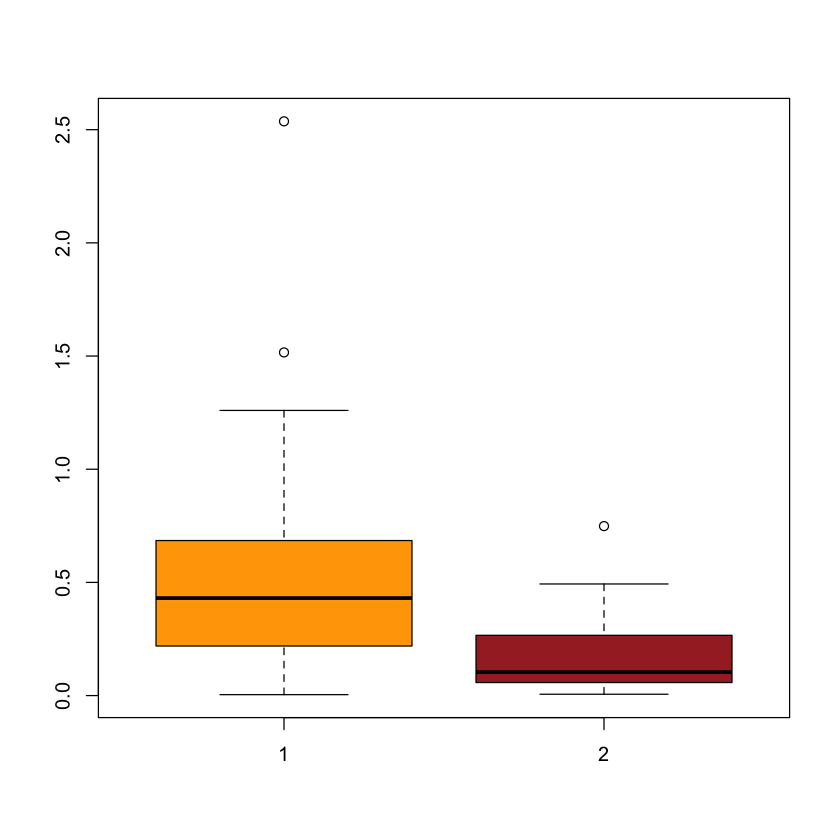

In [11]:
control = rexp(20, rate=2)
treatment = rexp(30, rate=5)
boxplot(control, treatment, col=c("orange","brown"))

We perform the nonparametric test

In [12]:
wilcox.test(control,treatment)


	Wilcoxon rank sum exact test

data:  control and treatment
W = 467, p-value = 0.0006911
alternative hypothesis: true location shift is not equal to 0


If the sample size is small (<5), it is not appropriate to use two sample t-test to compare two samples. But we can use nonparametric tests to compare two samples with a small sample size. 

## Likelihood Ratio Test (LRT)

In [13]:
x = rnorm(20, mean=1.5, sd = 1)

$H_0: \mu = 1$ and $H_1:\mu\ne 1$

We assume that the variance $\sigma^2=1$ is given and calculate the loglikelihood score log_L0 for the null hypothesis $\mu=1$

In [14]:
log_L0 = sum(log(dnorm(x,mean=1,sd=1)))

We calculate the loglikelihood score log_L1 for the alternative hypothesis. Because the alternative hypothesis does not specify the value of $\mu$, we use the maximum likelihood estimate (i.e., the sample average) of $\mu$ to calculate the loglikelihood score.

In [15]:
mu_hat = mean(x)
log_L1 = sum(log(dnorm(x,mean=mu_hat,sd=1)))

We calculate the LRT statistic and find the pvalue

In [16]:
t = -2*(log_L0 - log_L1)
critical_value = qchisq(0.95,df=1)
pvalue = 1-pchisq(t,df=1)
print(paste("pvalue =",pvalue))

[1] "pvalue = 0.0824821798968657"


## Normality test (Sapiro-Wilk test)
Sapiro-Wilk test can be used to test if the real data follow the normal distribution or not. We simulate data from the exponential distribution with rate = 1.

In [17]:
data = rexp(100)

$H_0:$ the normal distribution and $H_1:$ not the normal distribution

The Q-Q plot can illustrate if the dataset follows the normal distribution. It is a scatter plot of the sample quantiles generated from data versus the quantiles expected from the normal distribution. If the dataset follows the normal distribution, the points should be close to the straight line.

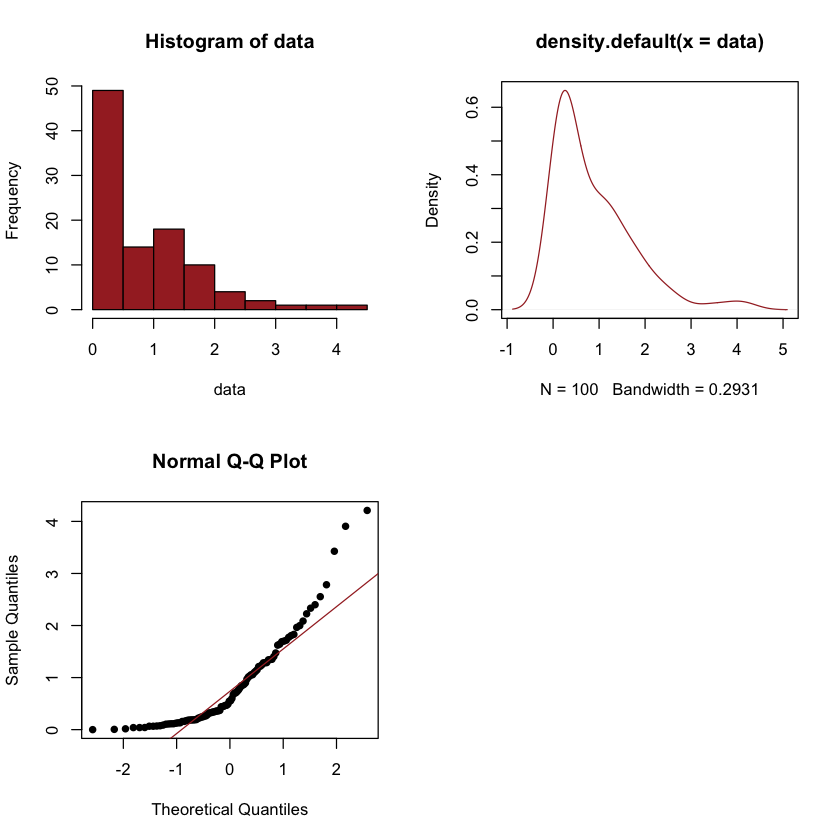

In [18]:
par(mfrow=c(2,2))
hist(data,col="brown")
plot(density(data),col="brown")
qqnorm(data, pch=16)
qqline(data, col = "brown")

The Sapiro-Wilk test is widely used to check normality.

In [19]:
shapiro.test(data)


	Shapiro-Wilk normality test

data:  data
W = 0.84007, p-value = 5.185e-09
